In [14]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import confusion_matrix ,classification_report

In [15]:
image_dir=Path('/kaggle/input/indian-food-classification')

In [16]:
filepaths=list(image_dir.glob(r'**/*.jpg'))
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
filepaths=pd.Series(filepaths,name='Filepaths').astype(str)
labels=pd.Series(labels,name='Label')
images=pd.concat([filepaths,labels],axis=1)
category_samples=[]

for category in images['Label'].unique():
    category_slices=images.query('Label==@category')
    category_samples.append(category_slices.sample(frac=1,random_state=1))
image_df=pd.concat(category_samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)

In [17]:
image_df

,Filepaths,Label
0,/kaggle/input/indian-food-classification/Food ...,chole_bhature
1,/kaggle/input/indian-food-classification/Food ...,chapati
2,/kaggle/input/indian-food-classification/Food ...,kadai_paneer
3,/kaggle/input/indian-food-classification/Food ...,kulfi
4,/kaggle/input/indian-food-classification/Food ...,samosa
...,...,...
6248,/kaggle/input/indian-food-classification/Food ...,chole_bhature
6249,/kaggle/input/indian-food-classification/Food ...,butter_naan
6250,/kaggle/input/indian-food-classification/Food ...,idli
6251,/kaggle/input/indian-food-classification/Food ...,momos


In [18]:
image_df['Label'].value_counts()

Label
chapati          413
kadai_paneer     412
chole_bhature    410
chai             381
fried_rice       353
pav_bhaji        353
butter_naan      328
dal_makhani      319
momos            319
masala_dosa      311
burger           309
idli             306
kaathi_rolls     293
jalebi           293
dhokla           289
pakode           278
pizza            261
samosa           261
kulfi            234
paani_puri       130
Name: count, dtype: int64

In [19]:
# This operation would be performed on the actual 'image_df' DataFrame
label_counts = image_df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Counts']
label_counts

,Label,Counts
0,chapati,413
1,kadai_paneer,412
2,chole_bhature,410
3,chai,381
4,fried_rice,353
5,pav_bhaji,353
6,butter_naan,328
7,dal_makhani,319
8,momos,319
9,masala_dosa,311


In [20]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
SEED = 42
PATH = "../input/indian-food-classification/Food Classification"

In [21]:
data_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)


Found 6269 files belonging to 20 classes.


In [22]:
# Get class names
classes = data_ds.class_names

In [23]:
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [24]:
# Get class names
classes = data_ds.class_names

In [25]:
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

# Detecting outliers
# Unusual Image size
This code identifies images in a dataset that have unusual sizes compared to the rest of the dataset. It begins by defining a path to the dataset and listing all the subdirectories, which correspond to different classes of images. For each image in these folders, the code reads the image using OpenCV, calculates its size in pixels by multiplying the width and height, and stores these sizes in a list. After converting the list of sizes into a NumPy array, the code calculates the z-scores—a statistical measure that indicates how many standard deviations a data point is from the mean of the dataset. It then identifies outliers as those images whose sizes have z-scores that exceed an absolute value of 3, which is a common threshold for outlier detection. These outliers are likely to be either much larger or smaller than the typical image size in the dataset. The indices of these outliers in the dataset are printed out, which can be used to further examine or process these specific images.

Found 168 outliers based on image size.
../input/indian-food-classification/Food Classification/momos/002.jpg
../input/indian-food-classification/Food Classification/momos/064.jpg
../input/indian-food-classification/Food Classification/momos/086.jpg
../input/indian-food-classification/Food Classification/momos/017.jpg
../input/indian-food-classification/Food Classification/momos/216.jpg


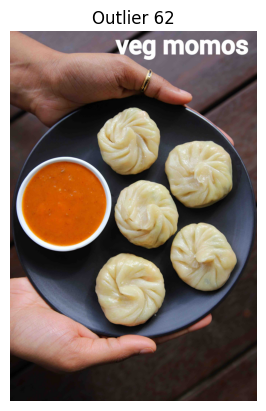

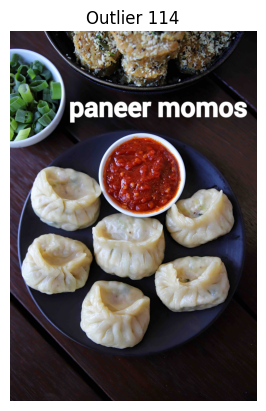

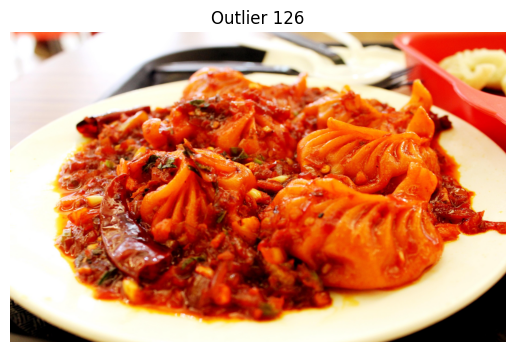

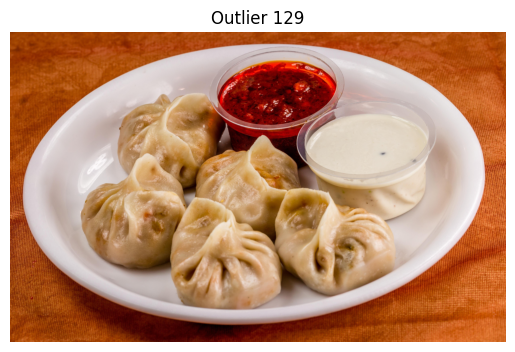

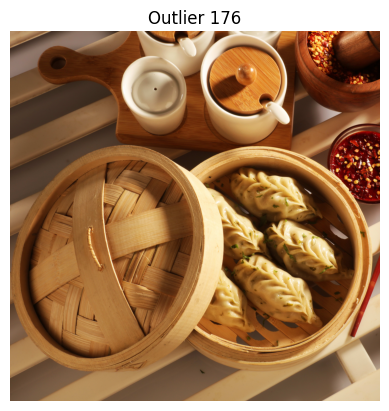

In [26]:
import os
import numpy as np
import cv2
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"

# List all the folders in the dataset
folders = [folder for folder in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, folder))]

# Initialize a list to store image sizes and file paths
image_sizes = []
file_paths = []

# Loop through each folder (which corresponds to a class)
for folder in folders:
    # Get a list of all the file names of images in this folder
    image_files = os.listdir(os.path.join(PATH, folder))
    # Loop through each image file
    for image_file in image_files:
        # Define the path to the image
        image_path = os.path.join(PATH, folder, image_file)
        # Load the image
        image = cv2.imread(image_path)
        # Check if the image was loaded correctly
        if image is not None:
            # Get the size (in pixels) of the image
            size = image.shape[0] * image.shape[1]
            # Append the size and file path to our lists
            image_sizes.append(size)
            file_paths.append(image_path)

# Convert the list to a NumPy array
image_sizes = np.array(image_sizes)

# Calculate z-scores for the image sizes
z_scores = zscore(image_sizes)

# Define a threshold for what we consider to be an outlier
threshold = 3

# Find indices of outliers
outlier_indices = np.where((z_scores > threshold) | (z_scores < -threshold))[0]

# Exclude outliers
non_outlier_indices = np.setdiff1d(np.arange(len(file_paths)), outlier_indices)
non_outlier_file_paths_1 = [file_paths[index] for index in non_outlier_indices]

# Display the number of outliers
print(f"Found {len(outlier_indices)} outliers based on image size.")

#  print the paths of the outliers
for index in outlier_indices[:5]:
    print(file_paths[index])

# Display individual outliers
for index in outlier_indices[:5]:
    image = cv2.cvtColor(cv2.imread(file_paths[index]), cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Outlier {index}")
    plt.show()

# Now can use non_outlier_file_paths for further processing


# Image Quality Outliers (using blur detection with Laplacian variance)
This code calculates the quality of images based on the variance of the Laplacian filter, which is a measure of sharpness or focus. Images with low variance in the Laplacian are typically blurry, and high variance indicates a sharp image. The code computes this focus measure for each image in the dataset and then uses a z-score to detect outliers, which are images that are significantly blurrier or sharper than the average. It displays the first few outlier images based on image quality.



Image Quality Outliers:


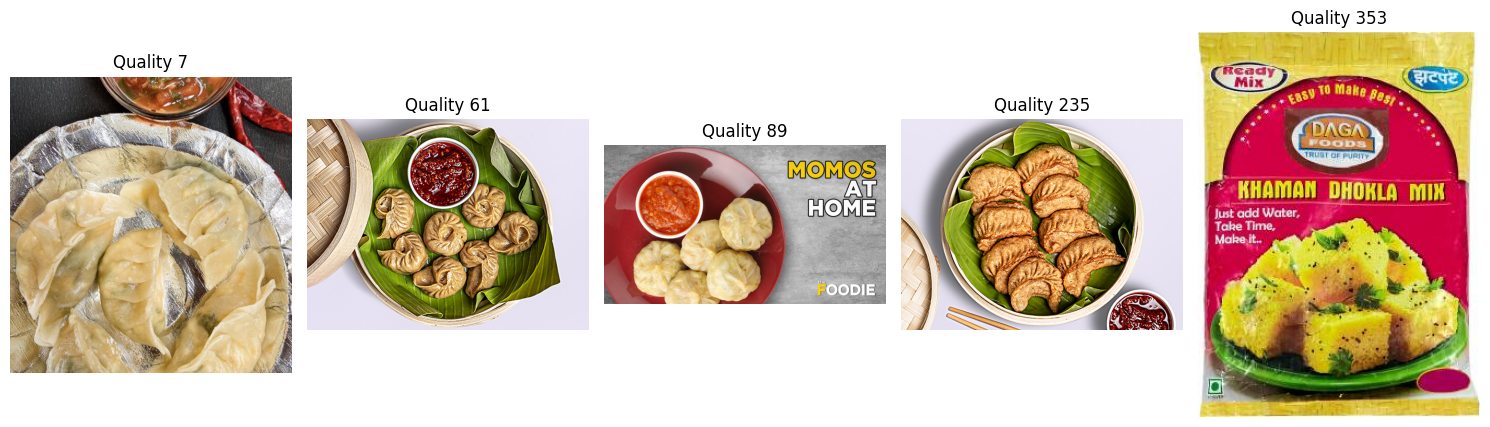

In [27]:
import os
import cv2
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"

# Function to calculate image quality using Laplacian variance
def calculate_image_quality(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    focus_measure = cv2.Laplacian(image, cv2.CV_64F).var()
    return focus_measure

# Load images and compute quality
file_paths = []
quality_scores = []

for folder in os.listdir(PATH):
    folder_path = os.path.join(PATH, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            quality = calculate_image_quality(image_path)
            if quality is not None:  # Only add if the image was successfully read
                file_paths.append(image_path)
                quality_scores.append(quality)

# Convert to NumPy array
quality_scores = np.array(quality_scores)

# Detect outliers
quality_outliers = np.where(zscore(quality_scores) > 3)[0]

# Exclude outliers from the dataset
non_outlier_indices = np.setdiff1d(np.arange(len(file_paths)), quality_outliers)
non_outlier_file_paths_2 = [file_paths[index] for index in non_outlier_indices]
non_outlier_quality_scores = quality_scores[non_outlier_indices]

# Display outliers
def display_outliers(outlier_indices, file_paths, title):
    if len(outlier_indices) == 0:
        print(f"No outliers detected for {title}.")
        return
    
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(outlier_indices[:5]):  # Displaying only first 5 outliers
        image = cv2.cvtColor(cv2.imread(file_paths[idx]), cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(f"{title} {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the display function
print("Image Quality Outliers:")
display_outliers(quality_outliers, file_paths, "Quality")

# You can now use non_outlier_file_paths and non_outlier_quality_scores for further analysis.


# Color histogram
This code calculates the color histograms of the images. A color histogram represents the distribution of colors in an image; it counts how many times each color appears. This is done across the RGB color channels. The code then uses a z-score to detect images whose color distribution is significantly different from that of the majority of images. Outliers could be images that are overly bright, dark, or have an unusual color cast. It displays the first few outlier images based on color distribution.

Color Histogram Outliers:


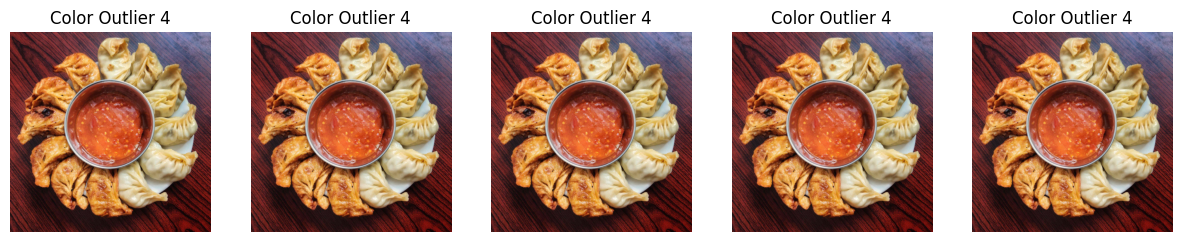

Stored non-outlier file paths.


In [28]:
import os
import cv2
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"  # Replace with the path to your dataset

# Function to calculate color histogram
def calculate_color_histogram(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    return hist.flatten()

# Function to display outliers
def display_outliers(outlier_indices, file_paths, title):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(outlier_indices[:5]):  # Show up to the first 5 outliers
        image = cv2.imread(file_paths[idx])
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{title} Outlier {idx}")
    plt.show()

# Load images and compute color histograms
file_paths_3 = []
color_histograms = []

for folder in os.listdir(PATH):
    folder_path = os.path.join(PATH, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            hist = calculate_color_histogram(image_path)
            if hist is not None:  # Skip if the image could not be read
                file_paths_3.append(image_path)
                color_histograms.append(hist)

# Convert to NumPy array
color_histograms = np.array(color_histograms)

# Detect outliers
color_outliers = np.where(zscore(color_histograms) > 3)[0]

# Filter out the outlier file paths
non_outlier_file_paths_3 = [file_paths_3[i] for i in range(len(file_paths_3)) if i not in color_outliers]

# Call the display function
print("Color Histogram Outliers:")
display_outliers(color_outliers, file_paths_3, "Color")

# The non_outlier_file_paths_3 now contains the file paths without the outliers
print("Stored non-outlier file paths.")


In [29]:
print(non_outlier_file_paths_1[:5])
print(non_outlier_file_paths_2[:5])
print(non_outlier_file_paths_3[:5])



['../input/indian-food-classification/Food Classification/momos/208.jpg', '../input/indian-food-classification/Food Classification/momos/029.jpg', '../input/indian-food-classification/Food Classification/momos/014.jpg', '../input/indian-food-classification/Food Classification/momos/275.jpg', '../input/indian-food-classification/Food Classification/momos/212.jpg']
['../input/indian-food-classification/Food Classification/momos/208.jpg', '../input/indian-food-classification/Food Classification/momos/029.jpg', '../input/indian-food-classification/Food Classification/momos/014.jpg', '../input/indian-food-classification/Food Classification/momos/275.jpg', '../input/indian-food-classification/Food Classification/momos/212.jpg']
['../input/indian-food-classification/Food Classification/momos/208.jpg', '../input/indian-food-classification/Food Classification/momos/029.jpg', '../input/indian-food-classification/Food Classification/momos/014.jpg', '../input/indian-food-classification/Food Classi

In [30]:
# Convert lists to sets
set_fp1 = set(non_outlier_file_paths_1)
set_fp2 = set(non_outlier_file_paths_2)
set_fp3 = set(non_outlier_file_paths_3)

# Find the intersection of the three sets
common_file_paths = list(set_fp1.intersection(set_fp2, set_fp3))

In [31]:
#print(len(common_file_paths))
cf = common_file_paths


In [39]:
type(cf)

list

In [40]:
k=cf[0].split('/')
k=k[-2]

4292

In [47]:
i=0
img_lable_after_removing_outlier=[]
for i in range(len(common_file_paths)):
    k=cf[i].split('/')
    img_lable_after_removing_outlier.append(k[-2])


In [50]:
import pandas as pd
import pandas as pd

series = pd.Series(img_lable_after_removing_outlier)

img_counts_after_removing_outlier = series.value_counts()

In [51]:
img_counts_after_removing_outlier

chapati          303
chole_bhature    290
chai             273
kadai_paneer     270
pav_bhaji        254
momos            243
butter_naan      242
fried_rice       241
dal_makhani      231
idli             215
kaathi_rolls     204
masala_dosa      199
pakode           192
samosa           191
burger           187
jalebi           184
dhokla           177
kulfi            158
pizza            154
paani_puri        84
Name: count, dtype: int64

#### Preview of some images

In [23]:
IMG_SIZE = (224, 224)  # VGG16 default image size

# Load images and labels
img = []
lbl = []
for file_path in common_file_paths:  # Replace with your actual file paths
    image = cv2.imread(file_path)
    if image is None:
        continue  # Skip files that aren't valid images
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    img.append(image)
    
    label = file_path.split(os.path.sep)[-2]
    lbl.append(label)


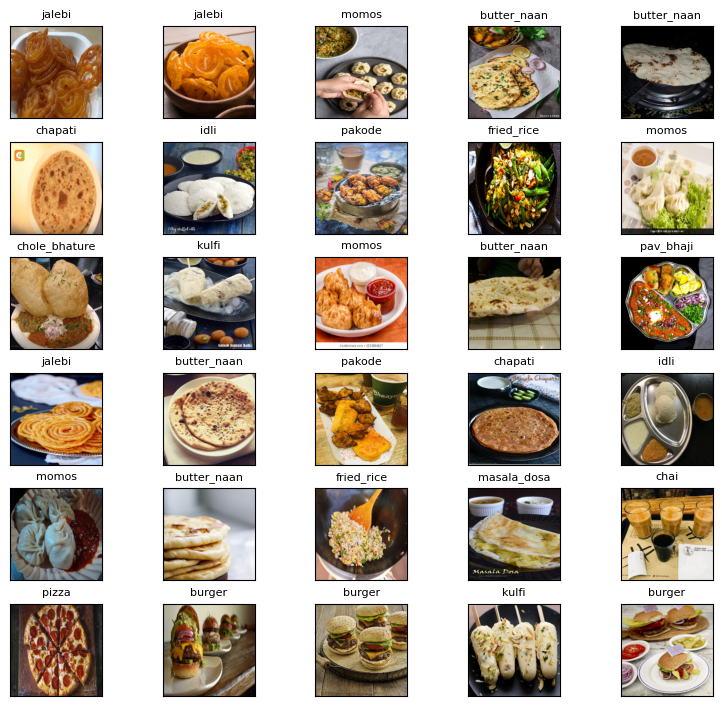

In [24]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.imshow(img[i])
    ax.set_title(lbl[i], fontsize = 8)
#     ax.set_title(df_unique.Labels[i], fontsize = 8)
plt.tight_layout(pad=0.5)
plt.show()

## Transfer Learning with the EfficientNETV2L

473176280/473176280 [==============================] - 2s 0us/step
Epoch 1/30


2024-05-06 17:56:09.158838: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


107/107 [==============================] - 81s 467ms/step - loss: 2.8053 - accuracy: 0.2311 - val_loss: 1.5458 - val_accuracy: 0.5821
Epoch 2/30
107/107 [==============================] - 42s 388ms/step - loss: 1.8720 - accuracy: 0.4549 - val_loss: 1.1536 - val_accuracy: 0.6857
Epoch 3/30
107/107 [==============================] - 41s 382ms/step - loss: 1.5405 - accuracy: 0.5519 - val_loss: 1.0148 - val_accuracy: 0.7090
Epoch 4/30
107/107 [==============================] - 41s 383ms/step - loss: 1.3880 - accuracy: 0.5839 - val_loss: 0.9442 - val_accuracy: 0.7357
Epoch 5/30
107/107 [==============================] - 41s 387ms/step - loss: 1.2845 - accuracy: 0.6181 - val_loss: 0.9050 - val_accuracy: 0.7474
Epoch 6/30
107/107 [==============================] - 41s 382ms/step - loss: 1.1761 - accuracy: 0.6463 - val_loss: 0.8471 - val_accuracy: 0.7590
Epoch 7/30
107/107 [==============================] - 41s 386ms/step - loss: 1.0822 - accuracy: 0.6786 - val_loss: 0.8268 - val_accuracy: 0.7

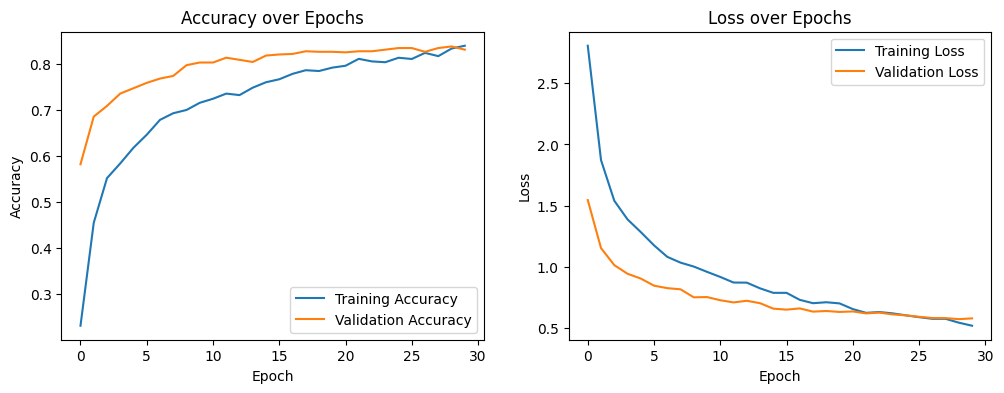

In [25]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


IMG_SIZE = (224, 224)  


images = []
labels = []
for file_path in common_file_paths:  
    image = cv2.imread(file_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

    
images = np.array(images, dtype=np.float32)
labels = np.array(labels)
images = preprocess_input(images)


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)


X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)


data_gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")


base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# Freeze base model layers and unfreeze the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False


x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(data_gen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=30, steps_per_epoch=len(X_train) // 32)


val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

27/27 [==============================] - 12s 210ms/step


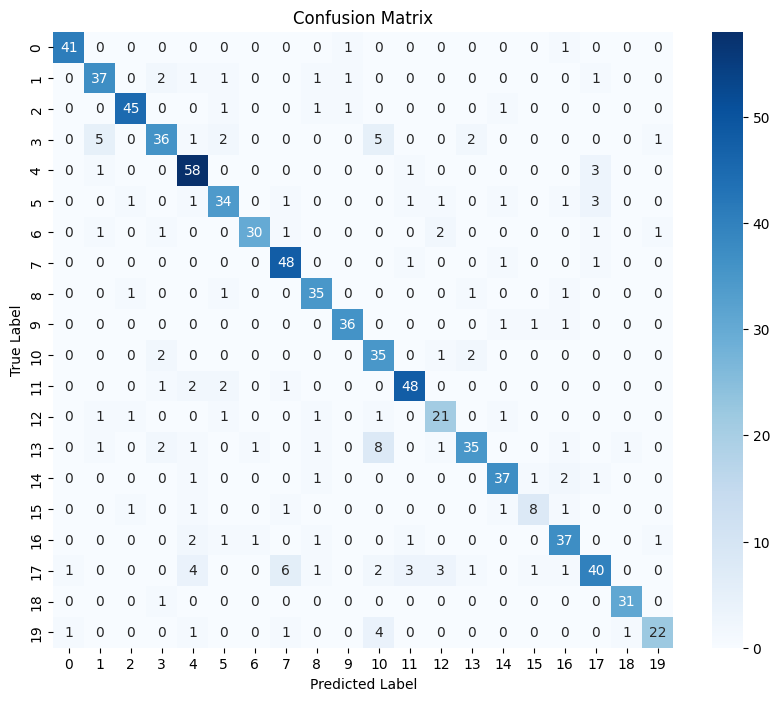

Validation Accuracy: 0.8312
Precision: 0.8334
Recall: 0.8270
F1 Score: 0.8266


In [26]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                           

In [32]:
print(base_model.input)
print(base_model.outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
[<KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'top_activation')>]


In [28]:
# import pickle
# with open('EfficientNetV2L_Transferlearning_20_cusine.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [30]:
# from IPython.display import FileLink
# FileLink('EfficientNetV2L_Transferlearning_20_cusine.pkl')

/kaggle/working/EfficientNetV2L_Transferlearning_20_cusine.pkl

# ===============================================================================

# Transfer Learning

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define constants
IMG_SIZE = (224, 224)  # VGG16 default image size

# Load images and labels
images = []
labels = []
for file_path in common_file_paths:  # Replace with your actual file paths
    image = cv2.imread(file_path)
    if image is None:
        continue  # Skip files that aren't valid images
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images, dtype=np.float32)
labels = np.array(labels)

# Preprocess images for VGG16
images = preprocess_input(images)

# Encode labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Load VGG16 pre-trained model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the custom top layers for our dataset
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Optionally plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='RdPu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = (224, 224)  # VGG16 default image size

# Load and preprocess images
images = []
labels = []
for file_path in common_file_paths:  # Replace with your actual file paths
    image = cv2.imread(file_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert to NumPy arrays and preprocess
images = np.array(images, dtype=np.float32)
labels = np.array(labels)
images = preprocess_input(images)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# Freeze base model layers and unfreeze the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Model architecture
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(data_gen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10, steps_per_epoch=len(X_train) // 32)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='RdPu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


# CNN with transfer learning

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Load images and labels
images = []
labels = []
for file_path in common_file_paths:
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert lists to NumPy arrays and normalize
images = np.array(images) / 255.0
labels = np.array(labels)

# One-hot encoding of labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Building the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(lr=1e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Load images and labels
images = []
labels = []
for file_path in common_file_paths:
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert lists to NumPy arrays and normalize
images = np.array(images) / 255.0
labels = np.array(labels)

# One-hot encoding of labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Building the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = RMSprop(lr=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# transfer lerning with new imagnet models

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = (224, 224)  # VGG16 default image size

# Load and preprocess images
images = []
labels = []
for file_path in common_file_paths:  # Replace with your actual file paths
    image = cv2.imread(file_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert to NumPy arrays and preprocess
images = np.array(images, dtype=np.float32)
labels = np.array(labels)
images = preprocess_input(images)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

# Load EfficientNetV2M model
base_model = EfficientNetV2M(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# Freeze base model layers and unfreeze the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Model architecture
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(data_gen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10, steps_per_epoch=len(X_train) // 32)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Confusion Matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')



In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = (224, 224)  # VGG16 default image size

# Load and preprocess images
images = []
labels = []
for file_path in common_file_paths:  # Replace with your actual file paths
    image = cv2.imread(file_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    images.append(image)
    label = file_path.split(os.path.sep)[-2]
    labels.append(label)

# Convert to NumPy arrays and preprocess
images = np.array(images, dtype=np.float32)
labels = np.array(labels)
images = preprocess_input(images)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

# Load EfficientNetV2M model
base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# Freeze base model layers and unfreeze the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Model architecture
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(data_gen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10, steps_per_epoch=len(X_train) // 32)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Confusion Matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

